In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import numpy as np
import dill as pickle

from src.data.dataset import *
from src.data import loop_ast
import pandas as pd

import seaborn as sns

In [ ]:
ls data

In [2]:
DatasetFromPkl.pickle_data('../data3/', 'data/speedup_dataset3.pkl')

Reading data


 19%|█▉        | 16292/84999 [00:00<00:00, 162916.66it/s]

data loaded
Serializing


100%|██████████| 84999/84999 [00:00<00:00, 188914.47it/s]


done


In [2]:
D = DatasetFromPkl('data/speedup_dataset2.pkl', maxsize=None)

function329_schedule_13
0
Loop 0 (1, 1048575):
	Loop 1 (1, 63):
		Computation 1:
			(Input 0, array([[1, 0, 0],
       [0, 1, 1]]))
			(Input 0, array([[ 1,  0,  0],
       [ 0,  1, -1]]))
			(Input 0, array([[1, 0, 1],
       [0, 1, 0]]))
			(Input 0, array([[1, 0, 1],
       [0, 1, 1]]))
			(Input 0, array([[ 1,  0,  1],
       [ 0,  1, -1]]))
			(Input 0, array([[ 1,  0, -1],
       [ 0,  1,  0]]))
			(Input 0, array([[ 1,  0, -1],
       [ 0,  1,  1]]))
			(Input 0, array([[ 1,  0, -1],
       [ 0,  1, -1]]))
			(Input 0, array([[1, 0, 0],
       [0, 1, 0]]))
{'computations': {'computations_array': [{'comp_id': 1,
                                          'lhs_data_type': 'p_int32',
                                          'loop_iterators_ids': [2, 3],
                                          'operations_histogram': [[5, 3, 0, 0],
                                                                   [0, 0, 0, 0],
                                                                   [0,

NameError: name 'exit' is not defined

In [3]:
!cat ../data3/programs/function329/function329_schedule_13/function329_schedule_13.json

{
    "interchange_dims" : [],
    "tiling" : {
        "tiling_depth" : 2,
        "tiling_dims" : [0, 1],
        "tiling_factors" : [64, 32]
    },
    "unrolling_factor" : null
}

In [5]:
df = pd.DataFrame()

df['program'] = D.program_indexes
df['speedup'] = D.Y
df['schedule'] = [D.schedules[index].binary_repr for index in range(len(D))]

In [7]:
schedules = set(df['schedule'])

In [21]:
df[(df.schedule==(1, 0, 0)) & (df.program ==110)].speedup

34    0.234309
Name: speedup, dtype: float32

In [23]:
scores = []

for sch in schedules:
    programs = set(df[df.schedule == sch].program)
    
    #score = np.mean([float(df[(df.schedule==sch) & (df.program == p)].speedup)/max(df[df.program==p].speedup) for p in programs])
    score = [(df[(df.schedule==sch) & (df.program == p)].speedup) for p in programs]
    scores.append(score)

In [36]:
programs = set(df.program)
schedules = set(df.schedule)

scores = {}
for schedule in schedules:
    scores[schedule] = []
    
for p in programs:
    tmp_df = df[df.program == p]
    
    best = max(tmp_df.speedup)
    
    for _, element in tmp_df.iterrows():
        scores[element.schedule].append(element.speedup/best)
        
for schedule in scores:
    scores[schedule] = np.mean(scores[schedule])
        

        
        

### (interchange, tile, unroll)

In [60]:
scores

[((0, 0, 1), 0.827033572001672),
 ((0, 1, 0), 0.5479196742465374),
 ((0, 1, 1), 0.5404869417333152),
 ((0, 0, 0), 0.4665233634258242),
 ((1, 0, 1), 0.3725360176938043),
 ((1, 0, 0), 0.3488203177861382),
 ((1, 1, 1), 0.2653837692052882),
 ((1, 1, 0), 0.2541793923647423)]

In [64]:
df.head()

,program,speedup,schedule
0,110,1.000000,"(0, 0, 0)"
1,110,1.927645,"(0, 1, 0)"
2,110,2.009328,"(0, 1, 1)"
3,110,1.992627,"(0, 1, 1)"
4,110,1.972955,"(0, 1, 0)"


### score(schedule: s) = mean for all program:p of ( speedup(s, p) / best_speedup(p))

In [57]:
scores

In [123]:
programs = set(df.program)

df1 = pd.DataFrame()

schedules = [(0, 1, 0), (1, 0, 0), (1, 1, 0)]
unrolled = []
not_unrolled = []

for p in programs:
    tmp_df = df[df.program == p]
    program_schedules = set(tmp_df.schedule)
    
    for sch in schedules:
        unrolled_sch = sch[0], sch[1], 1
        
        if sch in program_schedules and unrolled_sch in program_schedules:
            t = tmp_df[tmp_df.schedule == sch].speedup.mean()
            not_unrolled.append(t)
           
            t = tmp_df[tmp_df.schedule == unrolled_sch].speedup.mean()

            unrolled.append(t)
            
unrolled, not_unrolled = zip(*sorted(list(zip(unrolled, not_unrolled)), key=lambda x:x[1]))
            
df1['unrolled'] = unrolled
df1['not_unrolled'] = not_unrolled
df1['x'] = df1.index

In [124]:
df1['x'] = df1.index

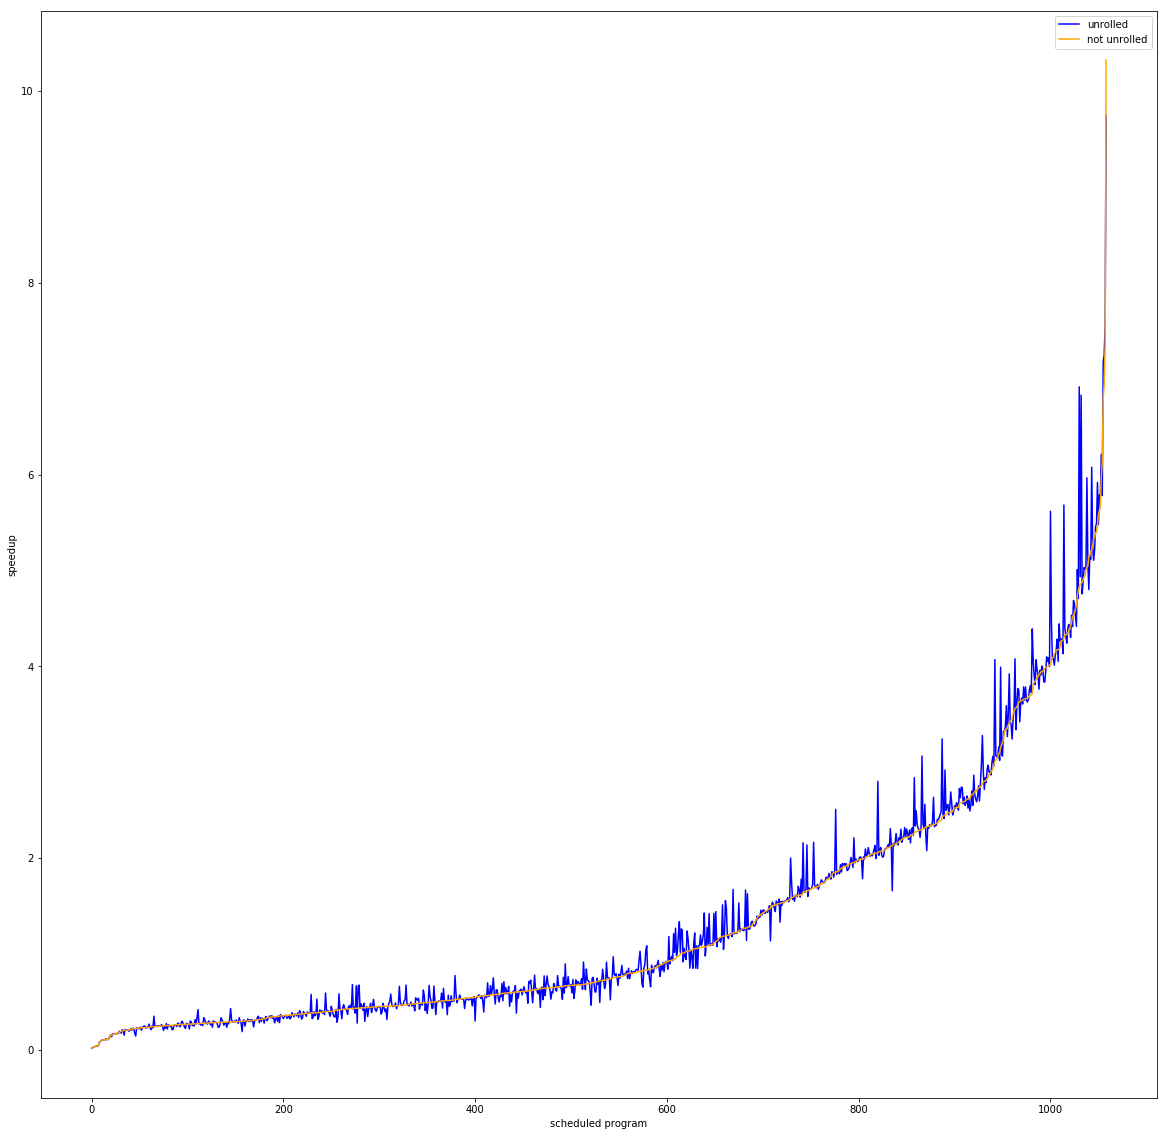

In [125]:
plt.plot('x', 'unrolled', data=df1, color='blue')
plt.plot('x', 'not_unrolled', data=df1, label='not unrolled', color='orange')
plt.xlabel('scheduled program')
plt.ylabel('speedup')
plt.legend()

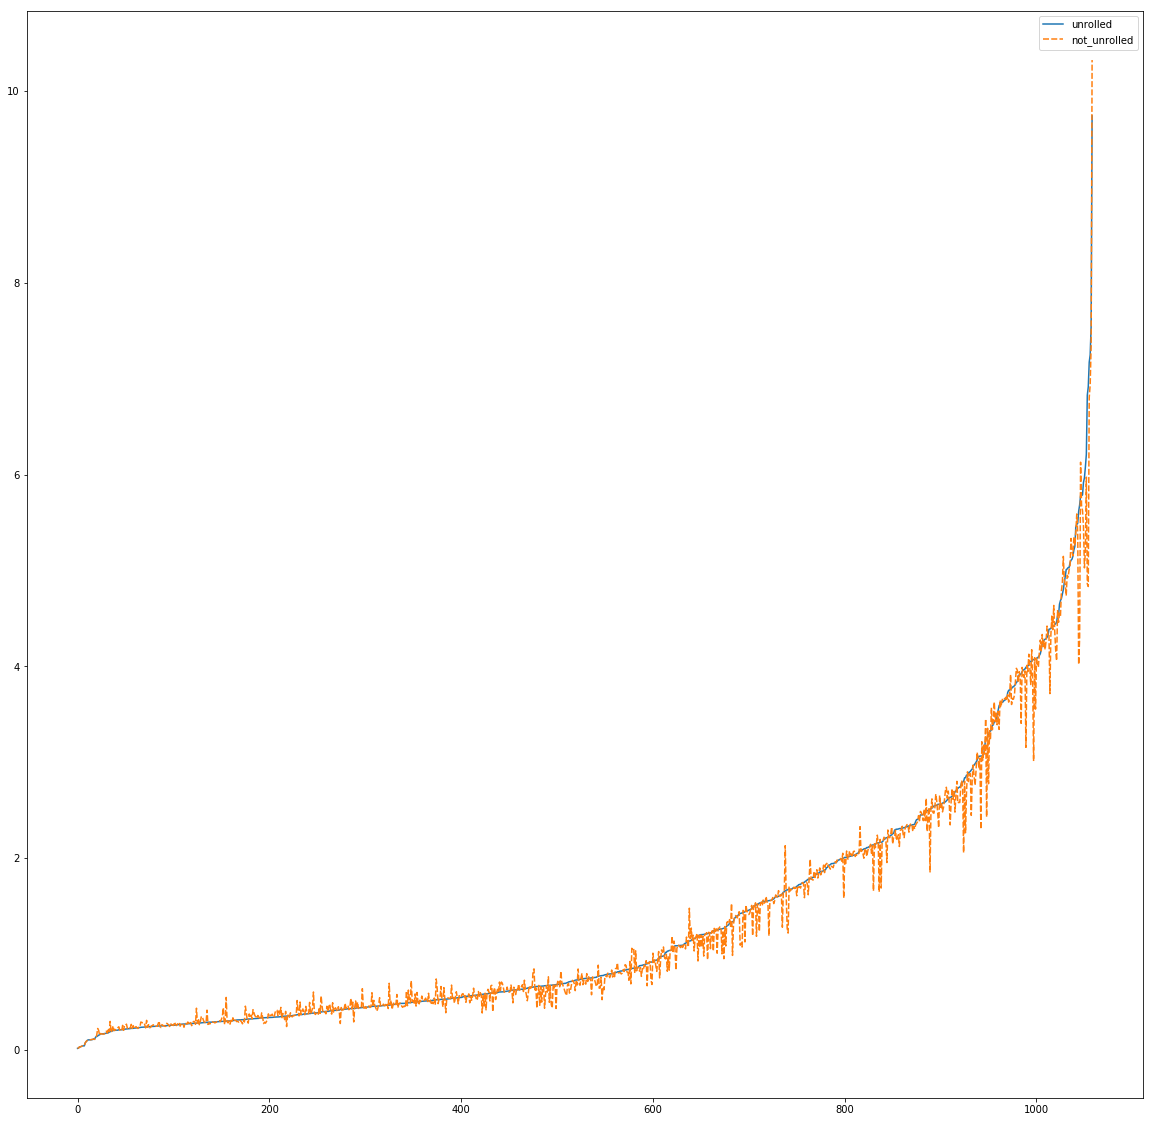

In [111]:
sns.lineplot(data=df1) (y + H*x)